# Supplementary Figures
## Imports

In [174]:
import pandas as pd
import StudyI_Pentatonic_vs_Chromatic.paths as StudyI_paths
from Shared_Scripts.plotting_functions import correlation
import StudyII_All_5_note_Sets.paths as StudyII_paths
import Study_Uniform.paths as Study_uniform_paths
import Study_Likert.paths as Study_likert_paths
import seaborn as sns
import os
from scipy import stats
from Shared_Scripts.stat_funcs import cohen_d_one_sample, cohen_d_independent_t_test

Run_Stats = True

studyI_GL = pd.read_pickle(
    StudyI_paths.processed_dir + StudyI_paths.post_exclusion_data_pickle_filename)  # Study I: Post-exclusion group-level data

studyI_TL = pd.read_pickle(
    StudyI_paths.processed_dir + StudyI_paths.processed_data_pickle_filename)  # Study I: Post-exclusion trial-level data

# Load Data
studyII_GL = pd.read_pickle(
    StudyII_paths.processed_dir + StudyII_paths.post_exclusion_data_pickle_filename)  # Study II: Post-exclusion group-level data

study_likert = pd.read_csv(Study_likert_paths.processed_dir + 'set_level_results.csv')  # Study II: Likert ratings

studyII_GL['EOS_std'] = studyII_GL['evenness_of_spread']**(1/2)
temp = studyII_GL['EOS_std_inv'] = 1-studyII_GL['EOS_std']

study_uniform_GL = pd.read_pickle(
    Study_uniform_paths.processed_dir + Study_uniform_paths.post_exclusion_data_pickle_filename)  # Study III: Post-exclusion group-level data

ROOT_DIR = os.path.abspath(os.getcwd())  # This is where this file is


+### Score distribution Table (in LaTeX format)

In [ ]:
temp = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)','IC1','IC2','IC3','IC4','IC5','IC6','EOS_std_inv']].sort_values(by='rate shifted - rate swapped (NN)', ascending=True)

# Rename "rate shifted - rate swapped (NN)" into "Bias towards note deviation"
temp = temp.rename(columns={'rate shifted - rate swapped (NN)':'Bias towards note deviation','set':'Set','EOS_std_inv':'Evenness'})

# Print Pandas as table
print(temp.style.to_latex())

### Score distribution Table (in pandas format)

In [ ]:
temp = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)','IC1','IC2','IC3','IC4','IC5','IC6','EOS_std_inv']].sort_values(by='rate shifted - rate swapped (NN)', ascending=True)

# Rename "rate shifted - rate swapped (NN)" into "Bias towards note deviation"
temp = temp.rename(columns={'rate shifted - rate swapped (NN)':'Bias towards note deviation','set':'Set','EOS_std_inv':'Evenness'})

# Create a doc file with the table
temp.to_csv('score_distribution_table.csv')

# Print Pandas as table
print(temp)

### Likert Ratings
#### "Some notes felt more important than others." correlation with scores

In [ ]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q1 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5, save_to=ROOT_DIR + "/Plots/correlation_likert_hierarchy.svg", line_kws={'color':'black','linewidth':1},scatter_kws={'color':'#3B54A5','s':15,'alpha':0.8})

#### "The audio clip was melodic." correlation with scores

In [ ]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q2 Mean', y='rate shifted - rate swapped (NN)', type='pearson',
            normalize=False, show_stats=False, width=5, height=5, save_to=ROOT_DIR + "/Plots/correlation_likert_melodic.svg",
            line_kws={'color':'black','linewidth':1},scatter_kws={'color':'#3B54A5','s':15,'alpha':0.8}
            )

stat_no_perm = stats.pearsonr(likert_corr["Q2 Mean"], s2["rate shifted - rate swapped (NN)"])
print(stat_no_perm)
print(stat_no_perm[0])

#### "The melody as a whole or parts of it felt familiar." correlation with scores

In [ ]:
s2 = studyII_GL.groupby('set').mean(numeric_only=True).reset_index()[['set','rate shifted - rate swapped (NN)']]
likert_corr = study_likert.merge(s2, on='set')
correlation(dataset=likert_corr,x='Q3 Mean', y='rate shifted - rate swapped (NN)', type='pearson', normalize=False, show_stats=False, width=5, height=5,save_to=ROOT_DIR + "/Plots/correlation_likert_familiarity.svg",
            line_kws={'color':'black','linewidth':1},scatter_kws={'color':'#3B54A5','s':15,'alpha':0.8}
            )

### Study I results  (12-note) for musicians and non-musicians

   length  sona subject_gender
0    12.0    16         Female
1    12.0     2           Male
2    16.0    16         Female
3    16.0     2           Male


D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


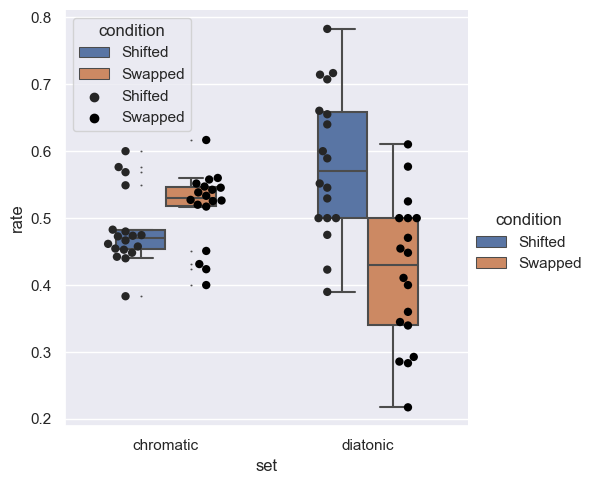

In [175]:
# Only keep rows with length 12 or 16
expt1_data_12_16_note = studyI_GL[studyI_GL['length'] >= 12]

# Only keep people who are not musicians
expt1_data_12_16_nonmusicians = expt1_data_12_16_note[expt1_data_12_16_note["How many years of formal musical training do you have?"] == "0"]
expt1_data_12_16_nonmusicians = expt1_data_12_16_nonmusicians[expt1_data_12_16_nonmusicians["Do you play any instruments (with or without formal training)?"] == "No"]

temp2 = expt1_data_12_16_nonmusicians.groupby(['sona','length','subject']).first().reset_index()
# group total subjects by length
temp2 = expt1_data_12_16_nonmusicians.groupby(['length', 'subject_gender']).count().reset_index()

print(temp2[['length','sona','subject_gender']])

expt1_data_12_16_nonmusicians = expt1_data_12_16_nonmusicians[['rate_NN_shifted','rate_NN_swapped','set']]
expt1_data_12_16_nonmusicians = pd.melt(expt1_data_12_16_nonmusicians,id_vars=["set"],var_name="condition",value_name="rate")
expt1_data_12_16_nonmusicians['condition'] = expt1_data_12_16_nonmusicians['condition'].replace('rate_NN_shifted',"Shifted")
expt1_data_12_16_nonmusicians['condition'] = expt1_data_12_16_nonmusicians['condition'].replace('rate_NN_swapped',"Swapped")

ax = sns.catplot(x="set", y="rate", data=expt1_data_12_16_nonmusicians, kind="box", hue="condition", fliersize=0.5, width=0.5, height=5, aspect=1)
sns.swarmplot(data=expt1_data_12_16_nonmusicians, x="set", y="rate", hue="condition", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)

# save figure
ax.savefig(ROOT_DIR + "/Plots/StudyI_musicianship.svg", format="svg", dpi=300)

In [ ]:
# Run Stats for non-musicians (Supp. Figure 1A)
if Run_Stats:
    # grab chromatic and pentatonic sets, respectively
    note_12_16_chromatic = expt1_data_12_16_nonmusicians[expt1_data_12_16_nonmusicians['set']=='chromatic']
    note_12_16_pentatonic = expt1_data_12_16_nonmusicians[expt1_data_12_16_nonmusicians['set']=='diatonic']
    
    [T_Val_12_16_note_pentatonic, P_12_16_note_pentatonic] = stats.ttest_1samp(note_12_16_pentatonic[note_12_16_pentatonic['condition']=='Shifted']['rate'].values, 0.5)
    [T_Val_12_16_chromatic, P_12_16_note_chromatic] = stats.ttest_1samp(note_12_16_chromatic[note_12_16_chromatic['condition']=='Shifted']['rate'].values, 0.5)
    
    effect_size_nonmusicians_pentatonic = cohen_d_one_sample(note_12_16_pentatonic[note_12_16_pentatonic['condition']=='Shifted']['rate'].values, 0.5)
    effect_size_nonmusicians_chromatic = cohen_d_one_sample(note_12_16_chromatic[note_12_16_chromatic['condition']=='Shifted']['rate'].values, 0.5)

### Study II - 3 worst sets vs 3 best sets for non-musicians

In [ ]:
# 3 worst sets: 01248 01236 01237
# 3 best sets: 02479 01358 02457
expt2_top_bottom = studyII_GL[studyII_GL['set'].isin(['0 1 2 4 8','0 1 2 3 6','0 1 2 3 7','0 2 4 7 9','0 1 3 5 8','0 2 4 5 7'])]

# Remove non-musicians
expt2_top_bottom_nonmusicians = expt2_top_bottom[expt2_top_bottom['How many years of formal musical training do you have?']=='0']
expt2_top_bottom_nonmusicians = expt2_top_bottom_nonmusicians[expt2_top_bottom_nonmusicians['Do you play any instruments (with or without formal training)?']=='No']

# Add column to label the sets as "Best" and "Worst"
expt2_top_bottom_nonmusicians['set_type'] = expt2_top_bottom_nonmusicians['set'].apply(lambda x: '3 with highest bias' if x in ['0 2 4 7 9','0 1 3 5 8','0 2 4 5 7'] else '3 with lowest bias')

# rename rate shifted - rate swapped (NN) to "rate"
expt2_top_bottom_nonmusicians = expt2_top_bottom_nonmusicians.rename(columns={'rate shifted - rate swapped (NN)':'rate'})

ax = sns.catplot(x="set_type", y="rate", data=expt2_top_bottom_nonmusicians, kind="box",  fliersize=0.5, width=0.5, height=5, aspect=1)
sns.swarmplot(data=expt2_top_bottom_nonmusicians, x="set_type", y="rate", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)

In [ ]:
# Run Stats for non-musicians (Supp. Figure 1B)
if Run_Stats:
    # get only set types
    new_df_study_2_highest_sets = expt2_top_bottom_nonmusicians[expt2_top_bottom_nonmusicians['set_type']=='3 with highest bias']
    new_df_study_2_lowest_sets = expt2_top_bottom_nonmusicians[expt2_top_bottom_nonmusicians['set_type']=='3 with lowest bias']
    
    [T_Val_lowest_highest, P_lowest_highest] = stats.ttest_ind(new_df_study_2_highest_sets["rate"], new_df_study_2_lowest_sets["rate"])
    
    effect_size_lowest_highest = cohen_d_independent_t_test(new_df_study_2_highest_sets["rate"], new_df_study_2_lowest_sets["rate"])

### Bias for uniform Sets (combined) for non-musicians

In [ ]:
expt3_data = study_uniform_GL

# Remove non-musicians
expt3_data_nonmusicians = expt3_data[expt3_data['How many years of formal musical training do you have?']=='0']
expt3_data_nonmusicians = expt3_data_nonmusicians[expt3_data_nonmusicians['Do you play any instruments (with or without formal training)?']=='No']

# Rename rate shifted - rate swapped (NN) to "rate"
expt3_data_nonmusicians = expt3_data_nonmusicians.rename(columns={'rate shifted - rate swapped (NN)':'rate'})

# Rename all sets to "uniform"
#expt3_data_nonmusicians['set'] = 'uniform'

ax = sns.catplot(x="set", y="rate", data=expt3_data_nonmusicians, kind="box",  fliersize=0.5, width=0.5, height=5, aspect=1)
sns.swarmplot(data=expt3_data_nonmusicians, x="set", y="rate", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)

# y-axis range
ax.set(ylim=(-0.4, 1))

# save figure
ax.savefig(ROOT_DIR + "/Plots/StudyIII_uniform.svg", format="svg", dpi=300)

In [ ]:
# Run Stats for non-musicians (Supp. Figure 1B)
if Run_Stats:
    # run stats for diminished and whole tone, individually
    expt3_data_nonmusicians_diminished = expt3_data_nonmusicians[expt3_data_nonmusicians['set'].isin(['diminished'])]
    # grab the same for whole tone
    expt3_data_nonmusicians_wholetone = expt3_data_nonmusicians[expt3_data_nonmusicians['set'].isin(['wholetone'])]
    
    [T_Val_diminished, P_diminished] = stats.ttest_1samp(expt3_data_nonmusicians_diminished['rate'], 0)
    effect_size_diminished = cohen_d_one_sample(expt3_data_nonmusicians_diminished['rate'], 0)
    
    [T_Val_wholetone, P_wholetone] = stats.ttest_1samp(expt3_data_nonmusicians_wholetone['rate'], 0)
    effect_size_wholetone  = cohen_d_one_sample(expt3_data_nonmusicians_wholetone['rate'], 0)

### Exp. 1 mean bias as a function of number of responses

D:\Users\selte\anaconda3\envs\Scale_Studies\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


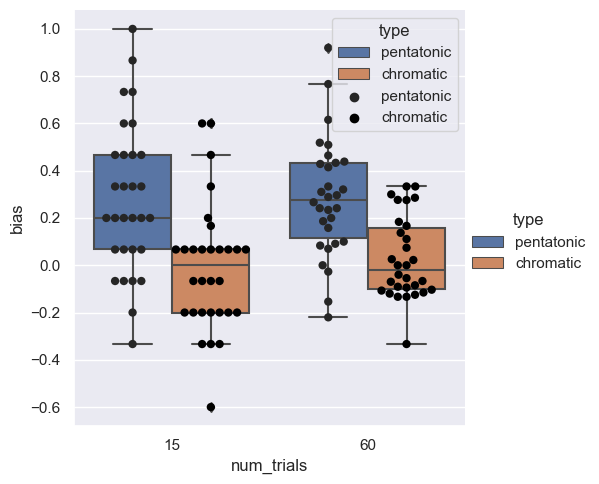

In [173]:
from matplotlib import pyplot as plt

temp = studyI_TL

# Convert to list of dictionaries
temp = temp.to_dict('records')

# Jumble the rows
import random



def get_for_trials(num_trials):
    random.shuffle(temp)
    subject_pentatonic_trials = {}
    subject_pentatonic_chose_shifted = {}
    subject_pentatonic_rate_shifted = {}
    subject_pentatonic_rate_swapped = {}
    subject_pentatonic_bias = {}
    
    subject_chromatic_trials = {}
    subject_chromatic_chose_shifted = {}
    subject_chromatic_rate_shifted = {}
    subject_chromatic_rate_swapped = {}
    subject_chromatic_bias = {}
    
    
    for row in temp:
        if row['chose']=='neither': continue
        if (row['length']!=12): continue
        if row['set'] == 'diatonic':
            if row['subject'] not in subject_pentatonic_trials:
                subject_pentatonic_trials[row['subject']] = 0
            
            if row['subject'] not in subject_pentatonic_chose_shifted:
                subject_pentatonic_chose_shifted[row['subject']] = 0
            if subject_pentatonic_trials[row['subject']] >= num_trials: continue
            subject_pentatonic_trials[row['subject']] += 1
            if row['chose'] == 'shifted':
                subject_pentatonic_chose_shifted[row['subject']] += 1
        elif row['set'] == 'chromatic':
            if row['subject'] not in subject_chromatic_trials:
                subject_chromatic_trials[row['subject']] = 0
            if row['subject'] not in subject_chromatic_chose_shifted:
                subject_chromatic_chose_shifted[row['subject']] = 0
            if subject_chromatic_trials[row['subject']] >= num_trials: continue
            subject_chromatic_trials[row['subject']] += 1
            if row['chose'] == 'shifted':
                subject_chromatic_chose_shifted[row['subject']] += 1
                
    # Compute the rate
    for key in subject_pentatonic_chose_shifted:
        subject_pentatonic_rate_shifted[key] = subject_pentatonic_chose_shifted[key]/subject_pentatonic_trials[key]
        subject_pentatonic_rate_swapped[key] = 1 - subject_pentatonic_rate_shifted[key]
    for key in subject_chromatic_chose_shifted:
        subject_chromatic_rate_shifted[key] = subject_chromatic_chose_shifted[key]/subject_chromatic_trials[key]
        subject_chromatic_rate_swapped[key] = 1 - subject_chromatic_rate_shifted[key]
    for key in subject_pentatonic_rate_shifted:
        subject_pentatonic_bias[key] = subject_pentatonic_rate_shifted[key] - subject_pentatonic_rate_swapped[key]
    for key in subject_chromatic_rate_shifted:
        subject_chromatic_bias[key] = subject_chromatic_rate_shifted[key] - subject_chromatic_rate_swapped[key]
        
        
    
        
        
            
            
    
    
    # Create a list with num_trials, subject, type (pentatonic or chromatic), bias
    record_list = []
    for key in subject_pentatonic_bias:
        record_list.append({'num_trials':num_trials,'bias':subject_pentatonic_bias[key],'type':'pentatonic', 'subject':key})
    for key in subject_chromatic_bias:
        record_list.append({'num_trials':num_trials,'bias':subject_chromatic_bias[key],'type':'chromatic', 'subject':key})
    
    return record_list

# Create df for the plot
record_list = []

# for i in range(30):
#     record_list += get_for_trials(i+1)
    
# df = pd.DataFrame(record_list)
# fig, ax = plt.subplots(figsize=(16, 6))

# Plot with error bars for each point
# ax = sns.pointplot(x='num_trials',y='bias',hue='type',data=df, errorbar=('ci',0))

record_list += get_for_trials(15)
record_list += get_for_trials(60)

df = pd.DataFrame(record_list)

# Make bar plot 
ax = sns.catplot(x="num_trials", y="bias", data=df, kind="box", hue="type")
# Add dots
sns.swarmplot(data=df, x="num_trials", y="bias", hue="type", palette='dark:black', dodge=True, ax=ax.axes[0][0], size=6)

# save figure
ax.savefig(ROOT_DIR + "/Plots/Exp1_bias_vs_num_trials.svg", format="svg", dpi=300)


 ## RUN STATISTICS

In [9]:
# Run Stats for non-musicians (Supp. Figure 1)
if Run_Stats:
    # 12 & 16 note sets (non-musicians)
    expt1_nonmusicians = studyI_GL[studyI_GL['length'] >= 12]
    
    # Only keep people who are not musicians
    expt1_nonmusicians = expt1_nonmusicians[expt1_nonmusicians["How many years of formal musical training do you have?"] == "0"]
    expt1_nonmusicians = expt1_nonmusicians[expt1_nonmusicians["Do you play any instruments (with or without formal training)?"] == "No"]

    note_12_16_chromatic = expt1_nonmusicians[expt1_nonmusicians['set']=='chromatic']
    note_12_16_pentatonic = expt1_nonmusicians[expt1_nonmusicians['set']=='diatonic']

    [T_Val_12_16_note_chromatic, P_12_16_note_chromatic] = stats.ttest_1samp(note_12_16_chromatic[note_12_16_chromatic['condition']=='Shifted']['rate'].values, 0.5)
    [T_Val_12_16_pentatonic, P_12_16_note_pentatonic] = stats.ttest_1samp(note_12_16_pentatonic[note_12_16_pentatonic['condition']=='Shifted']['rate'].values, 0.5)
    effect_size_nonmusicians_chromatic = cohen_d_one_sample(note_12_16_chromatic[note_12_16_chromatic['condition']=='Shifted']['rate'].values, 0.5)
    effect_size_nonmusicians_pentatonic = cohen_d_one_sample(note_12_16_pentatonic[note_12_16_pentatonic['condition']=='Shifted']['rate'].values, 0.5)
    
    
